## Exercise 1

Given the following dataset with two input random variables $X_1$ and $X_2$ and a target variable $Y$, we want to compare two extreme decision tree algorithms:

* OVERFIT will build a full standard ID3 decision tree, with no pruning;
* UNDERFIT will make no splits at all, always having a single node (which is both root and decision).

1. Plot the full OVERFIT tree.
1. What is the CVLOO error for OVERFIT?
1. What is the CVLOO error for UNDERFIT?

CVLOO scores for Overfit: 0.5
CVLOO scores for underfit: 0.5


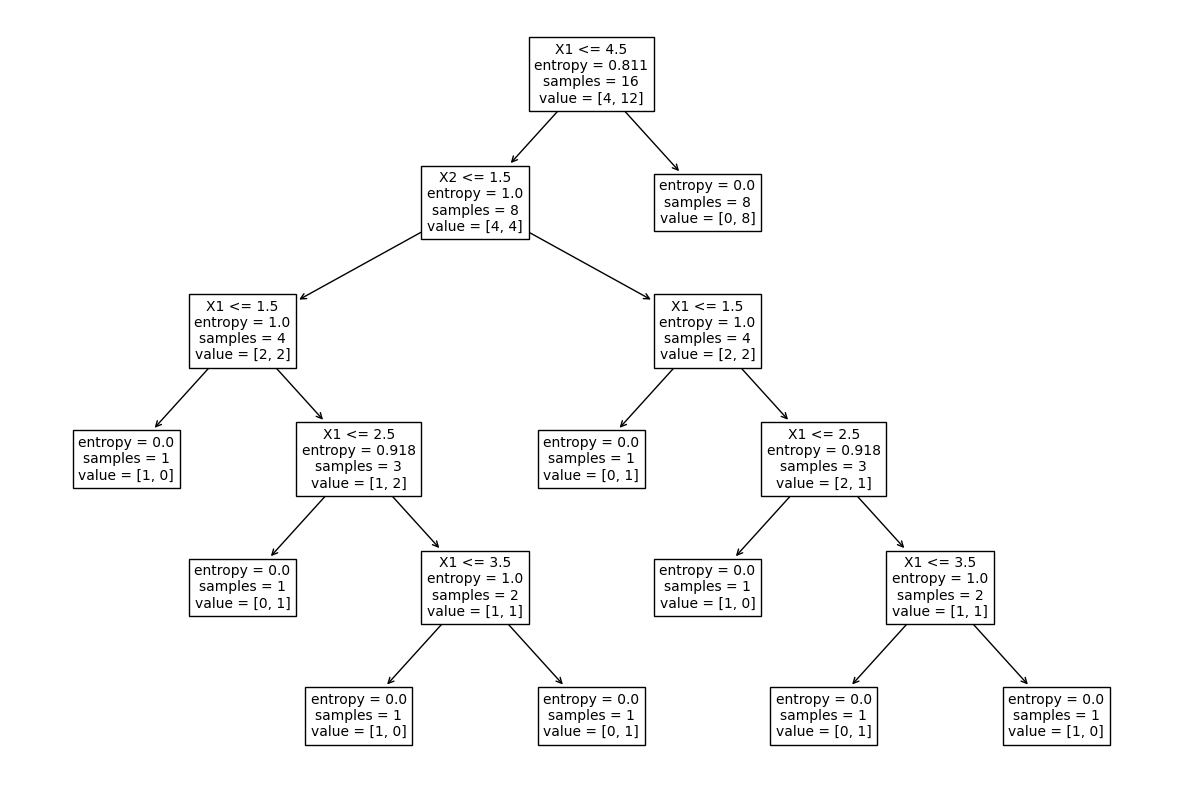

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from statistics import mean


d = pd.DataFrame({'X1': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8],
                  'X2': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
                  'Y' : [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]})
X = d[['X1', 'X2']]
y = d['Y']
dt_overfit = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
dt_underfit = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X,y)
fig, ax = plt.subplots(figsize=(15, 10))
f = tree.plot_tree(dt_overfit, ax=ax, fontsize=10, feature_names=X.columns)


loo = LeaveOneOut()
scores = cross_val_score(dt_overfit, X, y, cv=loo)
print("CVLOO scores for Overfit:", mean(scores))
scores = cross_val_score(dt_underfit, X, y, cv=loo)
print("CVLOO scores for underfit:", mean(scores))


plt.show()

## Exercise 2

Suppose we learned a decision tree from a training set with binary output values (either 0 or 1). We find that for a leaf node $l$, 

* there are $M$ training examples falling into it (labeled either 0 or 1); 
* its entropy is $H$. 

1. Create a graph using `matplotlib` that shows the entropy $H$ as a function of the proportion of 1s in $M$. The proportion should be on the $x$ axis (from 0 to 1), while the entropy should be on the $y$ axis.
1. Create a simple algorithm which takes as input $M$ and $H$ and that outputs the number of training examples misclassified by leaf node $l$.


## Exercise 3

Given the dataset below:
1. plot the points and the labels using `matplotib.pyplot.scatter`;
1. train a regular decision tree, then plot its decision surface;
1. create a new dataset with 1000 random points with coordinates between 0 and 10, which the diagonal line $X1 = X2$ perfectly separates in two classes. See [numpy.random.random_sample](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample) for easily generating random numbers between 0 and 1.
1. train a regular decision tree, then plot its decision surface on the new dataset.

c:\Users\aiaco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


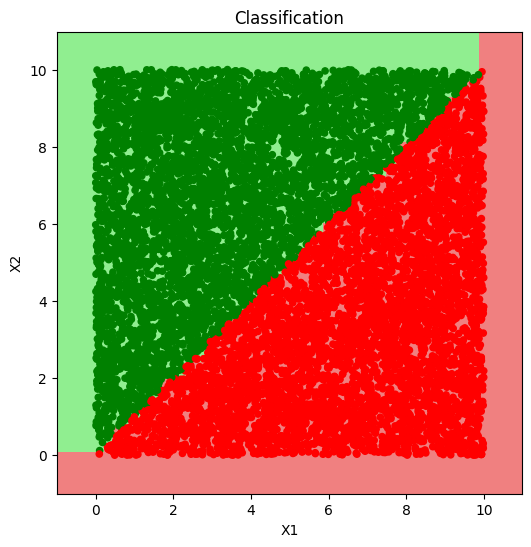

In [3]:
import pandas as pd
import numpy as np
from tools.plots import plot_decision_surface

d = pd.DataFrame({'X1': [1, 2, 3, 3, 3, 4, 5, 5, 5],
                  'X2': [2, 3, 1, 2, 4, 4, 1, 2, 4],
                  'Y':  [1, 1, 0, 0, 0, 0, 1, 1, 0]})

X, y = d[['X1', 'X2']], d['Y']

# subpct 1
c= ['green' if l == 0 else 'red' for l in y]
# fig, ax = plt.subplots(figsize=(5, 5))    # de decomentat
# plt.scatter(X['X1'], X['X2'], color=c)

# subpct 2
dt = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)
# plot_decision_surface(dt, X, y)   # de decomentat



# subpct 3 & 4
X_1 = 10 * np.random.random_sample((1000,)) 
X_2 = 10 * np.random.random_sample((1000,))
Y_new = list()
for index in range(1000):
    if X_1[index] > X_2[index]:
        Y_new.append(1)
    else:
        Y_new.append(0)
d_new = pd.DataFrame({'X1':X_1,
                      'X2':X_2,
                      'Y': Y_new})

X, y = d_new[['X1', 'X2']], d_new['Y']

dt_new = tree.DecisionTreeClassifier(criterion='entropy').fit(X, y)
#fig, ax = plt.subplots(figsize=(15, 10))
#f = tree.plot_tree(dt_new, ax=ax, fontsize=10, feature_names=X.columns)
#plt.show()             # de decomentat

plot_decision_surface(dt_new, X, y)    # de decomentat

## Exercise 4

Given the following dataset, with input attributes $A$, $B$, and $C$ and target attribute $Y$, predict the entry $A=0, B=0, C=1$ using `BernoulliNB(alpha=1e-10)` and `predict_proba()` then manually calculate the probabilities using the formulas.

In [4]:
import pandas as pd
from sklearn.naive_bayes import BernoulliNB

d = pd.DataFrame({'A': [0, 0, 1, 0, 1, 1, 1],
                  'B': [0, 1, 1, 0, 1, 0, 1],
                  'C': [1, 0, 0, 1, 1, 0, 0],
                  'Y': [0, 0, 0, 1, 1, 1, 1]})
print(d)

new_messages = pd.DataFrame(
  [(0, 0, 1)],
columns = ['A','B','C'])

cl = BernoulliNB(alpha = 1e-10).fit(d[['A','B','C']],  d['Y'])
print(f"Predicted class:{cl.predict(new_messages)}")
print(f"Probabilities:{cl.predict_proba(new_messages)}")

# manually on pdf

   A  B  C  Y
0  0  0  1  0
1  0  1  0  0
2  1  1  0  0
3  0  0  1  1
4  1  1  1  1
5  1  0  0  1
6  1  1  0  1
Predicted class:[1]
Probabilities:[[0.47058824 0.52941176]]


## Exercise 5

Consider two random variables $X_1$ and $X_2$ and a label $Y$ assigned to each instance as in the dataset `d` created below.

1. Classify the instance $X_1=0,X_2=0$ using Naive Bayes.

1. According to Naive Bayes, what is the probability of this classification?

1. How many probabilities are estimated by the model (check the `class_log_prior_` and `feature_log_prob_` attributes)?

1. How many probabilities would be estimated by the model if there were $n$ features instead of 2?

In [7]:
import pandas as pd
from tools.pd_helpers import apply_counts

d_grouped = pd.DataFrame({
    'X1': [0, 0, 1, 1, 0, 0, 1, 1],
    'X2': [0, 0, 0, 0, 1, 1, 1, 1],
    'C' : [2, 18, 4, 1, 4, 1, 2, 18],
    'Y' : [0, 1, 0, 1, 0, 1, 0, 1]})
d = apply_counts(d_grouped, 'C')

instance = pd.DataFrame(
  [(0, 0)],
columns = ['X1','X2'])
cl = BernoulliNB(alpha = 1e-10).fit(d[['X1','X2']],  d['Y'])
print(f"Predicted class:{cl.predict(instance)}")
print(f"Probabilities:{cl.predict_proba(instance)}")
print(cl.class_log_prior_)
print(cl.feature_log_prob_)

Predicted class:[1]
Probabilities:[[0.24 0.76]]
[-1.42711636 -0.27443685]


TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''